In [48]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [43]:
base_url = "https://www.realclearpolling.com/polls/"
sample_url = "president/republican-primary/2024/national"
sample_url = "president/general/2024/trump-vs-biden"
url = base_url + sample_url

In [44]:
# Create a webdriver instance and get the page source
driver = webdriver.Chrome()
driver.get(url)

# Allow time for dynamic content to load (you may need to adjust the sleep duration)
time.sleep(5)

# Get the page source after dynamic content has loaded
html_content = driver.page_source

# Close the webdriver
driver.quit()

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html5lib')

# Now you can extract the table data using the same approach as before
table = soup.find_all('table')

if len(table)==2:
    table = table[1]
else:
    table = table[0]

table_data = []
for row in table.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    table_data.append(row_data)

In [52]:
#Convert table data to a dataframe
#We remove the first row since this is RCP summary data that we don't want to use

current_year = str(datetime.now().year)

df = pd.DataFrame(table_data[2:], columns=table_data[0])
df["Difference"] = df["Trump (R)"].astype(float) - df["Biden (D)"].astype(float)
df["Type of Voter"] = df["sample"].str.split(" ").str[1]
df["Sample Size"] = df["sample"].str.split(" ").str[0]
#We need to add the year to the date to make it a datetime object
#We need to make sure the year we add is the year the poll was taken, not necessarily the current year
df["End Date"] = df["date"].str.split("-").str[1] 
df["Poll Month"] = df["date"].str.split("/").str[0]
#df["End Date"] = pd.to_datetime(df["End Date"], format="mixed")
df

,pollster,date,sample,moe,Trump (R),Biden (D),spread,Difference,Type of Voter,Sample Size,End Date,Poll Month
0,Reuters/Ipsos,1/22 - 1/24,1028 RV,—,43,38,Trump+5,5.0,RV,1028,1/24,1
1,Economist/YouGov,1/21 - 1/23,1497 RV,2.8,44,43,Trump+1,1.0,RV,1497,1/23,1
2,The Messenger/HarrisX,1/17 - 1/21,3034 RV,1.8,53,47,Trump+6,6.0,RV,3034,1/21,1
3,Morning Consult,1/19 - 1/21,6417 RV,1.0,45,40,Trump+5,5.0,RV,6417,1/21,1
4,Harvard-Harris,1/17 - 1/18,2346 RV,—,53,47,Trump+6,6.0,RV,2346,1/18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
223,Harvard-Harris,10/26 - 10/28,1578 RV,—,46,45,Trump+1,1.0,RV,1578,10/28,10
224,Grinnell/Selzer,10/13 - 10/17,745 LV,3.6,40,40,Tie,0.0,LV,745,10/17,10
225,Rasmussen Reports,9/21 - 9/22,1000 LV,3.0,51,41,Trump+10,10.0,LV,1000,9/22,9
226,Emerson,8/30 - 9/1,1200 RV,2.7,47,46,Trump+1,1.0,RV,1200,9/1,8


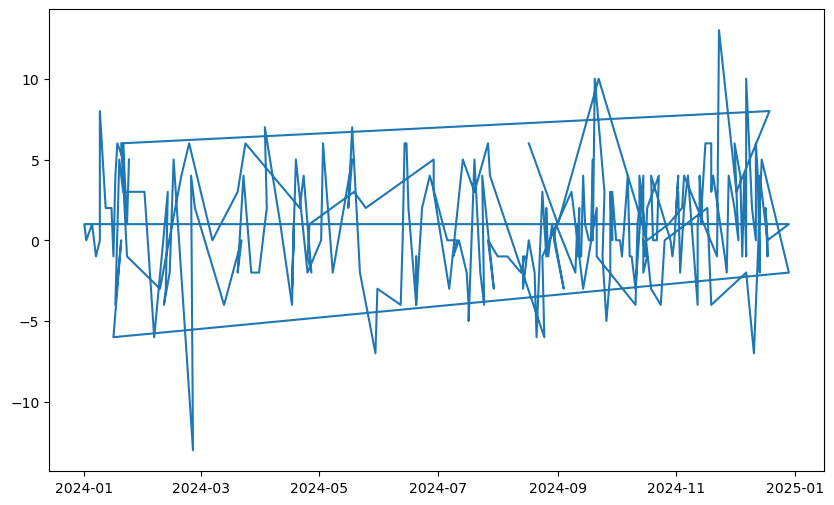

In [49]:
# Initial Visualization
plt.figure(figsize=(10,6))
plt.plot(df["End Date"], df["Difference"])

## LV vs. RVs Time Series Analysis

Also adjust for who is taking the poll/bias. Plus recency weighted bias. 
Predict spread based on LV vs. RV, date, and polling company. Work with ARIMA model, with dummy variables for polling companies.
Baseline prediction could be realclear spread at that time. And then we can compare whether the spread is better or worse than our prediction. 

Look for differences between Joe Biden Voters and Liberal Voters, as well as Trump Voters and Conservative voters. Has anything changed?

Difference between overall favorability, and job approval.

Compare likely to vote for, vs. past voting.

In [47]:
#Time Series Modeling (ARIMA)

#Spread = Poll Company + Type of Voter + Time + Sample Size?